In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time
import yfinance as yf
import datetime as dt

In [2]:
#Pre Covid(Jan 2019-Dec 2019)
import yfinance as yf

Costco=yf.Ticker("COST")

print(Costco)

# get stock info
Costco.info

# get historical market data, here max is 5 years.
Costco.history(period="max")


yfinance.Ticker object <COST>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-07-09 00:00:00-04:00,7.439345,7.700375,7.352335,7.656870,1116800,0.0,0.0
1986-07-10 00:00:00-04:00,7.700376,7.743880,7.439346,7.613366,595600,0.0,0.0
1986-07-11 00:00:00-04:00,7.569864,7.613369,7.352339,7.352339,800400,0.0,0.0
1986-07-14 00:00:00-04:00,7.395841,7.395841,7.047801,7.134811,738000,0.0,0.0
1986-07-15 00:00:00-04:00,7.091310,7.091310,6.482241,6.917290,2059200,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,477.049988,490.000000,474.500000,488.549988,2036000,0.0,0.0
2022-11-08 00:00:00-05:00,490.730011,498.260010,484.510010,492.760010,1709900,0.0,0.0
2022-11-09 00:00:00-05:00,491.899994,497.579987,486.859985,489.970001,1640500,0.0,0.0


In [3]:
Costco_data_df = pd.DataFrame(Costco.history(period="max"))
Costco_data_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-07-09 00:00:00-04:00,7.439348,7.700378,7.352338,7.656873,1116800,0.0,0.0
1986-07-10 00:00:00-04:00,7.700376,7.743881,7.439346,7.613366,595600,0.0,0.0
1986-07-11 00:00:00-04:00,7.569858,7.613363,7.352334,7.352334,800400,0.0,0.0
1986-07-14 00:00:00-04:00,7.395843,7.395843,7.047803,7.134813,738000,0.0,0.0
1986-07-15 00:00:00-04:00,7.091305,7.091305,6.482236,6.917285,2059200,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,477.049988,490.000000,474.500000,488.549988,2036000,0.0,0.0
2022-11-08 00:00:00-05:00,490.730011,498.260010,484.510010,492.760010,1709900,0.0,0.0
2022-11-09 00:00:00-05:00,491.899994,497.579987,486.859985,489.970001,1640500,0.0,0.0


In [4]:
Costco_data_df.to_csv("Costco.csv")


In [5]:
Costco_data_df.reset_index(inplace=True)
Costco_data_df['index'] = Costco_data_df.index
Costco_data_df['Date'] = pd.to_datetime(Costco_data_df['Date'], format='%Y-%m-%d')
Costco_data_df = Costco_data_df[["Date","Close"]]
Costco_data_df

,Date,Close
0,1986-07-09 00:00:00-04:00,7.656873
1,1986-07-10 00:00:00-04:00,7.613366
2,1986-07-11 00:00:00-04:00,7.352334
3,1986-07-14 00:00:00-04:00,7.134813
4,1986-07-15 00:00:00-04:00,6.917285
...,...,...
9158,2022-11-07 00:00:00-05:00,488.549988
9159,2022-11-08 00:00:00-05:00,492.760010
9160,2022-11-09 00:00:00-05:00,489.970001
9161,2022-11-10 00:00:00-05:00,513.130005


In [6]:
Costco_pre_covid_df = Costco_data_df.loc[((Costco_data_df['Date'].dt.year == 2019))]
Costco_pre_covid_df.sort_values(by=['Date'])


,Date,Close
8188,2019-01-02 00:00:00-05:00,193.152725
8189,2019-01-03 00:00:00-05:00,189.058746
8190,2019-01-04 00:00:00-05:00,194.548828
8191,2019-01-07 00:00:00-05:00,195.265747
8192,2019-01-08 00:00:00-05:00,196.727890
...,...,...
8435,2019-12-24 00:00:00-05:00,280.277100
8436,2019-12-26 00:00:00-05:00,281.705872
8437,2019-12-27 00:00:00-05:00,280.162750
8438,2019-12-30 00:00:00-05:00,281.143951


In [7]:
#Create a dataframe for Costco pre-covid stock data (Jan 2019 - Dec 2019) By Month
monthly_close_pre_covid_df = pd.DataFrame(Costco_pre_covid_df.groupby(Costco_pre_covid_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_pre_covid_df['Store'] = 'Costco'
monthly_close_pre_covid_df['Timeframe'] = 'Pre-Covid'

monthly_close_pre_covid_df

,Month,Close,Store,Timeframe
0,1,197.835597,Costco,Pre-Covid
1,2,202.170990,Costco,Pre-Covid
2,3,219.552742,Costco,Pre-Covid
3,4,231.371047,Costco,Pre-Covid
4,5,231.871196,Costco,Pre-Covid
5,6,245.715379,Costco,Pre-Covid
6,7,262.017770,Costco,Pre-Covid
7,8,263.056633,Costco,Pre-Covid
8,9,277.094048,Costco,Pre-Covid
9,10,281.472352,Costco,Pre-Covid


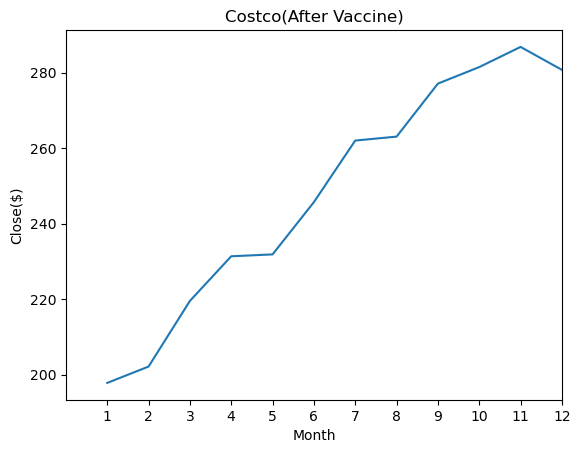

In [8]:
x = monthly_close_pre_covid_df['Month']
y = monthly_close_pre_covid_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Costco(After Vaccine)");

In [9]:
#Dateframe Before Vaccine(Jan 2020 - Nov 2020)
Costco_before_vaccine_df = Costco_data_df.loc[((Costco_data_df['Date'] >= '2020-01-01') & (Costco_data_df['Date'] < '2020-12-01'))]
Costco_before_vaccine_df.sort_values(by=['Date'])

,Date,Close
8440,2020-01-02 00:00:00-05:00,277.667023
8441,2020-01-03 00:00:00-05:00,277.895569
8442,2020-01-06 00:00:00-05:00,277.971893
8443,2020-01-07 00:00:00-05:00,277.533661
8444,2020-01-08 00:00:00-05:00,280.715240
...,...,...
8666,2020-11-23 00:00:00-05:00,366.696533
8667,2020-11-24 00:00:00-05:00,369.107849
8668,2020-11-25 00:00:00-05:00,372.498993
8669,2020-11-27 00:00:00-05:00,373.113800


In [10]:
#Create a dataframe for Costco before Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_before_vaccine_df = pd.DataFrame(Costco_before_vaccine_df.groupby(Costco_before_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_before_vaccine_df['Store'] = 'Costco'
monthly_close_before_vaccine_df['Timeframe'] = 'Before Vaccine'

monthly_close_before_vaccine_df

,Month,Close,Store,Timeframe
0,1,288.462867,Costco,Before Vaccine
1,2,296.615808,Costco,Before Vaccine
2,3,284.126584,Costco,Before Vaccine
3,4,291.305350,Costco,Before Vaccine
4,5,291.620798,Costco,Before Vaccine
5,6,289.799619,Costco,Before Vaccine
6,7,308.882742,Costco,Before Vaccine
7,8,326.779531,Costco,Before Vaccine
8,9,330.997922,Costco,Before Vaccine
9,10,354.586169,Costco,Before Vaccine


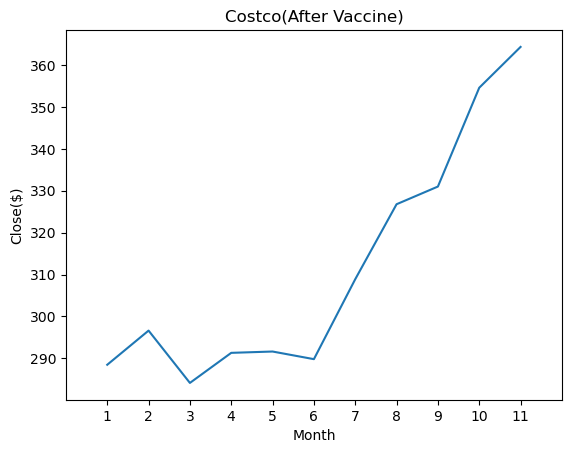

In [11]:
x = monthly_close_before_vaccine_df['Month']
y = monthly_close_before_vaccine_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Costco(After Vaccine)");

In [12]:
#Dateframe After Vaccine(Dec 2020 - Dec 2021)
Costco_after_vaccine_df = Costco_data_df.loc[((Costco_data_df['Date'] > '2020-11-30') & (Costco_data_df['Date'] <= '2021-12-31'))]
Costco_after_vaccine_df.sort_values(by=['Date'])

,Date,Close
8671,2020-12-01 00:00:00-05:00,382.068817
8672,2020-12-02 00:00:00-05:00,378.066315
8673,2020-12-03 00:00:00-05:00,368.750214
8674,2020-12-04 00:00:00-05:00,368.139008
8675,2020-12-07 00:00:00-05:00,368.040436
...,...,...
8940,2021-12-27 00:00:00-05:00,559.725098
8941,2021-12-28 00:00:00-05:00,560.887329
8942,2021-12-29 00:00:00-05:00,563.996521
8943,2021-12-30 00:00:00-05:00,560.162231


In [13]:
#Create a dataframe for Costco After Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_after_vaccine_df = pd.DataFrame(Costco_after_vaccine_df.groupby(Costco_after_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_after_vaccine_df['Store'] = 'Costco'
monthly_close_after_vaccine_df['Timeframe'] = 'After Vaccine'

monthly_close_after_vaccine_df

,Month,Close,Store,Timeframe
0,1,358.897108,Costco,After Vaccine
1,2,346.886237,Costco,After Vaccine
2,3,328.233470,Costco,After Vaccine
3,4,362.528011,Costco,After Vaccine
4,5,377.196568,Costco,After Vaccine
5,6,382.294746,Costco,After Vaccine
6,7,408.985138,Costco,After Vaccine
7,8,443.425149,Costco,After Vaccine
8,9,454.467766,Costco,After Vaccine
9,10,459.987978,Costco,After Vaccine


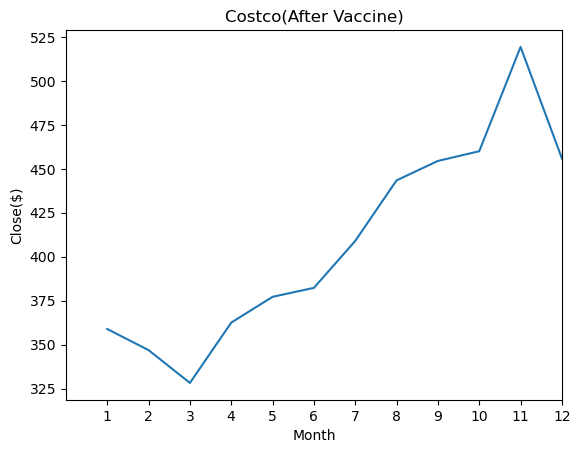

In [14]:
x = monthly_close_after_vaccine_df['Month']
y = monthly_close_after_vaccine_df['Close']
plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Costco(After Vaccine)");


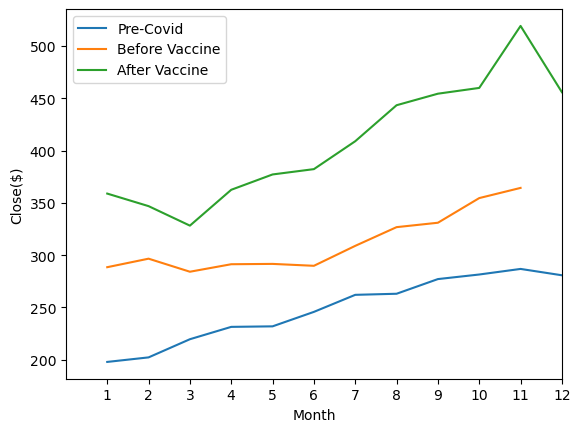

In [15]:
frames = [monthly_close_pre_covid_df, monthly_close_before_vaccine_df, monthly_close_after_vaccine_df]

Costco_FINAL_df = pd.concat(frames)

fig,ax = plt.subplots()

for timeframe in ['Pre-Covid', 'Before Vaccine', 'After Vaccine']:
    ax.plot(Costco_FINAL_df[Costco_FINAL_df.Timeframe==timeframe].Month,Costco_FINAL_df[Costco_FINAL_df.Timeframe==timeframe].Close,label=timeframe)

plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")

ax.legend(loc='best')